In [2]:
#Importing Necessary Libraries

In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings('ignore')

# Loading Dataset

In [135]:
data = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


PassengerID: Unique ID of a passenger
Survived: If the passenger survived(0-No, 1-Yes)
Pclass: Passenger Class(1st, 2nd, 3rd)
Name: Name of the passenger
Sex: Male/Female
Age: Passenger age in years
StbSp: No. of siblings/spouses aboard
Parch: No of parents/children aboard
Ticket: Ticket number
Fare: Passenger fare
Cabin: Cabin number
Embarked: port of Embarkation(C = Cherbourg; Q = Queenstown; S = Southampton)

In [89]:
# we can see that our target variable i.e., Survived is of categorical in nature. Hence we wwill deal with classification models only

In [90]:
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [91]:
data.shape

(891, 12)

We have 891 rows and 12 columns in our dataset

In [92]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


describe method is unable to show the cotegorical data.

In [93]:
data.isnull().sum() # let's check the null values in our dataset

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Age, Cabin, Embarked are the columns having null values. We need to fill them with appropriate values later on but let's first do the EDA part

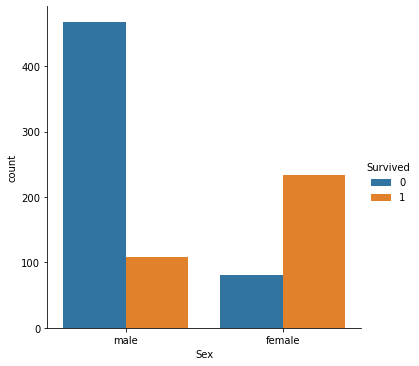

In [94]:
#Countplot
sns.catplot(x = "Sex", hue = "Survived", kind = "count", data = data)

It can be observed from the graph that survival rate of women is greater than those of men hence sex plays an important rol in determining if one is going to survive or not.

Let's plot graph to check the relation with Pclass(Ordinal Feature) vs Survived

<AxesSubplot:xlabel='Survived', ylabel='Pclass'>

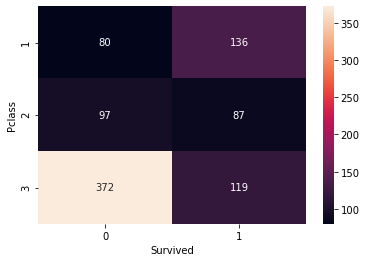

In [95]:
#Groupthe dataset by Pclass and Survived and Unstack them
group = data.groupby(['Pclass', 'Survived'])
pclass_survived = group.size().unstack()
#Heatmap - Color encoded 2D reperesentation
sns.heatmap(pclass_survived, annot = True, fmt = 'd')

HIgher class passengers has more survival rate than the lower class ones. Class1 passengers have a higher survival chance compared to class2 and 3. It implies that Pclass contributes a lot to a passenger's survival rate.

Let's plot Age(continuous Feature) vs Survived

<AxesSubplot:xlabel='Sex', ylabel='Age'>

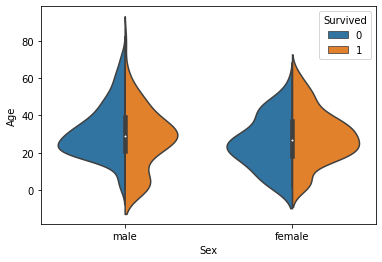

In [96]:
#Violinplot Displays distribution of data across all levels of a category.
sns.violinplot(x = 'Sex', y = "Age", hue = "Survived", data = data, split = True)

THis graph gives a summary of the age range of men, women and children who were saved. The survival rate is - 
Good for children.
High for women in the age range 20-50.
less for men as the age increases.


Since Age column is important, the missing values needs to be filled


Now let's plot Factor plot for family_size(Count Feature) and Family Size.

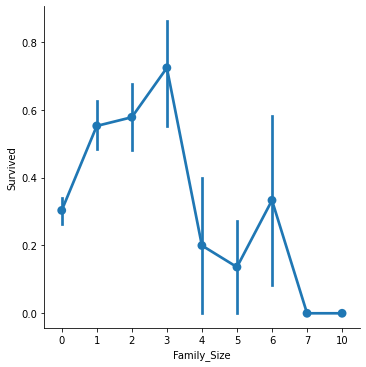

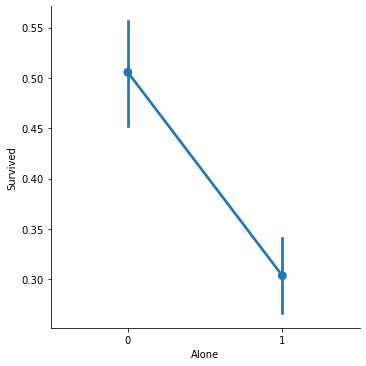

In [97]:
#Adding a column Family_Size
data['Family_Size'] = 0
data['Family_Size'] = data['Parch']+data['SibSp']
#Adding a column Alone
data['Alone'] = 0
data.loc[data.Family_Size == 0, 'Alone'] = 1
#Factorplot for Family_Size
sns.factorplot(x = 'Family_Size', y = 'Survived', data = data)
#Factorplot for Alone
sns.factorplot(x = 'Alone', y = 'Survived', data = data)

Family_size denotes the number of people in a passenger's family and is calculated by summing the SibSp and Parch columns of a respective passenger. Also, another column Alone is added to check the chances of survival of a lone passenger against the one with a family.

Important Observation: -
* If a passenger is alone, the survival rate is less.
* If the family size is greater than 5, chances of survival decreases cinsiderably


Let's plot a Bar plot for fare(Continuous Feature)

<AxesSubplot:xlabel='Fare_Range', ylabel='Survived'>

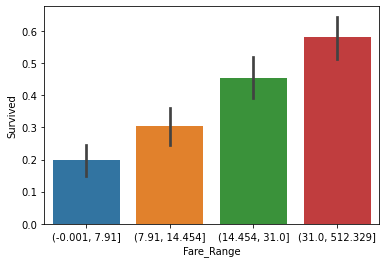

In [139]:
#Divide Fare into 4 bins
data['Fare_Range'] = pd.qcut(data['Fare'], 4)
#Barplot - shows approximate values based on the height of bars.
sns.barplot(x = 'Fare_Range', y = 'Survived', data =data)

Fare denotes the fare paid by a passenger. As the values in this column are continuous, they need to be put in separate bins(as done for Age Feature) to get a clear idea. It can be concluded that if a passenger paid a higher fare, the survival rate is more.

Let's plot categorical count plots for embarked feature

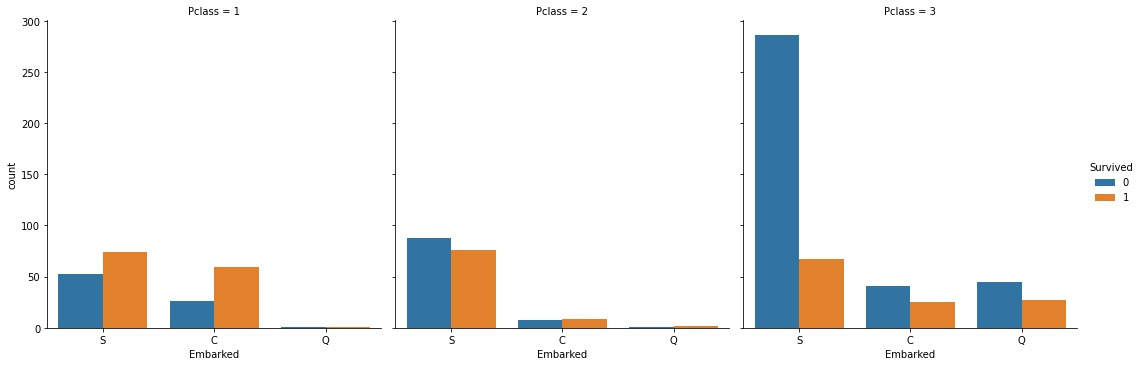

In [99]:
#Countplot
sns.catplot(x = 'Embarked', hue = 'Survived', kind = 'count', col = 'Pclass', data = data)

Some notable Observations are:
* majority of passengers boarded from S. So, the missing values can be filled with S.
* Majority of class3 passengers boarded from Q
* S looks lucky for class1 and class2 passengers compared to class3.

# conclusion:
* passengerId, Name, Ticket, cabin are the strings that cannot be categorized and don't contribute much to the outcome.
* Age, fare needs to be retained. 

In [152]:
data['Age'] = data['Age'].fillna(data['Age'].median()) # Filling Na values with median

In [153]:
data['Embarked'] = data['Embarked'].fillna('S') # Most of the passengers embarked from Southampton

In [154]:
df = data.drop(columns = ['PassengerId', 'Name', 'Ticket', 'Cabin','Fare_Range']) # We don't need these column in our model

In [155]:
df.isnull().sum() # checking the null values

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [141]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# there are no null values in our dataset. 

In [142]:
A = df.drop(columns = ['Sex','Embarked'], inplace = False) # dropping nominal data to check the distribution

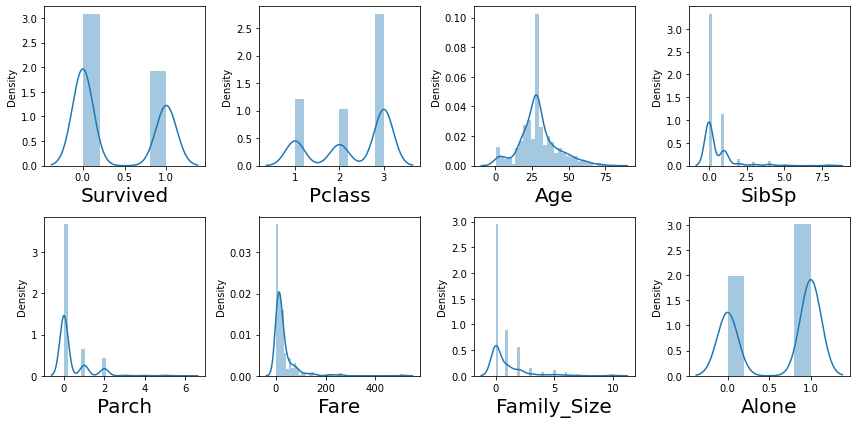

In [106]:
plt.figure(figsize = (12,6), facecolor = 'white')
plotnumber = 1
for column in A:
    if plotnumber <= 8:
        ax = plt.subplot(2,4,plotnumber)
        sns.distplot(x=A[column])
        plt.xlabel(column, fontsize= 20)
    plotnumber+=1
plt.tight_layout()

Age and Fare are only continous varibles. Age is somewhat normallly distributed but fare is not. Let's apply IQR method to deal with the outliers. 

<AxesSubplot:xlabel='Fare'>

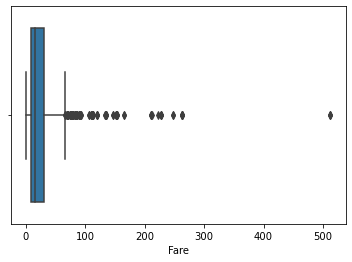

In [326]:
sns.boxplot(x=A['Fare'])

# IQR Method

In [327]:
percentile25 = A['Fare'].quantile(0.25)
percentile75 = A['Fare'].quantile(0.75)
iqr = percentile75 - percentile25
upper_limit = percentile75 + 1.5 * iqr

upper_limit

65.6344

In [329]:
A[A['Fare'] > upper_limit] # Information resides within outliers range

,Survived,Pclass,Age,SibSp,Parch,Fare
1,1,1,38.0,1,0,71.2833
27,0,1,19.0,3,2,263.0000
31,1,1,28.0,1,0,146.5208
34,0,1,28.0,1,0,82.1708
52,1,1,49.0,1,0,76.7292
...,...,...,...,...,...,...
846,0,3,28.0,8,2,69.5500
849,1,1,28.0,1,0,89.1042
856,1,1,45.0,1,1,164.8667
863,0,3,28.0,8,2,69.5500


In [330]:
new_df = A[A['Fare'] < upper_limit]
new_df.shape

(775, 6)

Near about 13% of data has been removed from our data with IQR method but we have decreased the degree of skewness from our dataset.

In [331]:
new_df 

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500
5,0,3,28.0,0,0,8.4583
...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000
887,1,1,19.0,0,0,30.0000
888,0,3,28.0,1,2,23.4500
889,1,1,26.0,0,0,30.0000


<AxesSubplot:xlabel='Fare'>

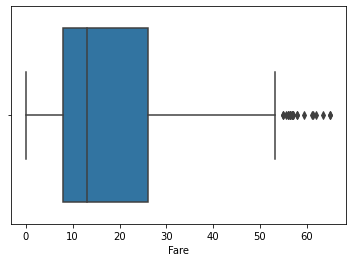

In [332]:
sns.boxplot(x=new_df['Fare'])

We are unable to remove 100% outliers from fare column

<AxesSubplot:ylabel='Density'>

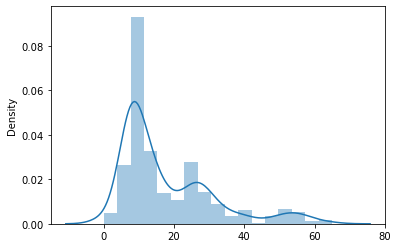

In [333]:
sns.distplot(x=new_df['Fare'])

In [334]:
new_df

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500
5,0,3,28.0,0,0,8.4583
...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000
887,1,1,19.0,0,0,30.0000
888,0,3,28.0,1,2,23.4500
889,1,1,26.0,0,0,30.0000


In [335]:
new_df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500
5,0,3,28.0,0,0,8.4583


In [336]:
df['Fare'] = new_df['Fare'] 

In [337]:
df.shape

(775, 8)

In [338]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,1
2,1,3,0,26.0,0,0,7.9250,0
3,1,1,0,35.0,1,0,53.1000,0
4,0,3,1,35.0,0,0,8.0500,1
5,0,3,1,28.0,0,0,8.4583,1
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,1
887,1,1,0,19.0,0,0,30.0000,0
888,0,3,0,28.0,1,2,23.4500,0
889,1,1,1,26.0,0,0,30.0000,1


In [339]:
df = df[df['Fare'].notna()]

In [340]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,1
2,1,3,0,26.0,0,0,7.9250,0
3,1,1,0,35.0,1,0,53.1000,0
4,0,3,1,35.0,0,0,8.0500,1
5,0,3,1,28.0,0,0,8.4583,1
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,1
887,1,1,0,19.0,0,0,30.0000,0
888,0,3,0,28.0,1,2,23.4500,0
889,1,1,1,26.0,0,0,30.0000,1


In [341]:
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import make_column_transformer
le = LabelEncoder()
df2 = le.fit_transform(df['Embarked'])
df2 = le.fit_transform(df['Sex'])
pd.Series(df2)

0      1
1      0
2      0
3      1
4      1
      ..
770    1
771    0
772    0
773    1
774    1
Length: 775, dtype: int64

In [342]:
df['Embarked'] = df2
df['Sex'] = df2

In [343]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,1
2,1,3,0,26.0,0,0,7.9250,0
3,1,1,0,35.0,1,0,53.1000,0
4,0,3,1,35.0,0,0,8.0500,1
5,0,3,1,28.0,0,0,8.4583,1
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,1
887,1,1,0,19.0,0,0,30.0000,0
888,0,3,0,28.0,1,2,23.4500,0
889,1,1,1,26.0,0,0,30.0000,1


In [345]:
# df['Survived'].value_counts()

In [346]:
# sns.countplot(df['Survived'])

# Multicollinearity inspection

In [347]:
df.drop('Survived', axis = 1).corrwith(df.Survived)

Pclass     -0.238532
Sex        -0.499888
Age        -0.118009
SibSp      -0.003156
Parch       0.098575
Fare        0.234422
Embarked   -0.499888
dtype: float64

Our data is not multicollinear

In [348]:
x = df.drop(columns = ['Survived'], axis = 1)# Dividing our data into features and labels
y = df['Survived']

In [349]:
from sklearn.preprocessing import MinMaxScaler # Scaling our featture data
scaler = MinMaxScaler()
x_scaler = scaler.fit_transform(x)

# Train_test_split

In [351]:
x_train, x_test, y_train, y_test  = train_test_split(x,y,test_size = 0.25, random_state=1)

# Logistic Regression

In [352]:
log_reg = LogisticRegression()

In [353]:
log_reg.fit(x_train, y_train)

LogisticRegression()

In [354]:
log_reg.score(x_train, y_train)

0.7969018932874354

In [355]:
log_reg_y_pred = log_reg.predict(x_test)

In [356]:
log_reg_cfm = confusion_matrix(y_test, log_reg_y_pred)
log_reg_cfm

array([[107,  20],
       [ 25,  42]], dtype=int64)

In [290]:
log_reg.score(x_test, y_test)

0.7680412371134021

In [291]:
print(classification_report(y_test, log_reg_y_pred, digits = 2))

              precision    recall  f1-score   support

           0       0.81      0.84      0.83       127
           1       0.68      0.63      0.65        67

    accuracy                           0.77       194
   macro avg       0.74      0.73      0.74       194
weighted avg       0.76      0.77      0.77       194



# Decision Tree

In [292]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state = 0, max_depth = 5)
dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=0)

In [293]:
dt.score(x_train, y_train)

0.8330464716006885

In [294]:
dt_y_pred = dt.predict(x_test)

In [295]:
dt_cfm = confusion_matrix(y_test, dt_y_pred)
dt_cfm

array([[112,  15],
       [ 21,  46]], dtype=int64)

In [296]:
dt.score(x_test, y_test)

0.8144329896907216

In [297]:
print(classification_report(y_test, dt_y_pred, digits = 2))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       127
           1       0.75      0.69      0.72        67

    accuracy                           0.81       194
   macro avg       0.80      0.78      0.79       194
weighted avg       0.81      0.81      0.81       194



# RandomForest

In [388]:
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier(max_depth = 5) #without hyperparameter tuning

In [389]:
params = {'n_estimators':[13,15],
         'criterion':['entropy','ginni'],
         'max_depth':[5,15],
         'min_samples_split':[10,11],
         'min_samples_leaf':[5,6],
         }

grd = GridSearchCV(rf, param_grid = params)
grd.fit(x_train, y_train)
print('best_param = >', grd.best_params_)

best_param = > {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 15}


In [390]:
rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=5)

In [391]:
rf.score(x_train, y_train)

0.8571428571428571

In [392]:
rf_y_pred = rf.predict(x_test)

In [393]:
rf_cfm = confusion_matrix(y_test, rf_y_pred)
rf_cfm

array([[117,  10],
       [ 22,  45]], dtype=int64)

In [394]:
rf.score(x_test, y_test)

0.8350515463917526

In [395]:
print(classification_report(y_test, rf_y_pred, digits = 2))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88       127
           1       0.82      0.67      0.74        67

    accuracy                           0.84       194
   macro avg       0.83      0.80      0.81       194
weighted avg       0.83      0.84      0.83       194



Let's us fit our data with hyperparameter tuning

In [396]:
RF = RandomForestClassifier(criterion='entropy', max_depth=15, min_samples_leaf=5,
                       min_samples_split=10, n_estimators=15)

In [397]:
RF.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=15, min_samples_leaf=5,
                       min_samples_split=10, n_estimators=15)

In [398]:
RF.score(x_train, y_train)

0.8605851979345955

In [399]:
RF.score(x_test, y_test)

0.8247422680412371

There is slight improvement with Hyperparameter tuning

# KNN Model

In [381]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [382]:
knn.score(x_train, y_train)

0.8055077452667814

In [383]:
knn_y_pred = knn.predict(x_test)

In [384]:
cfm = confusion_matrix(y_test, knn_y_pred)
cfm

array([[98, 29],
       [32, 35]], dtype=int64)

In [385]:
knn.score(x_test, y_test)

0.6855670103092784

In [386]:
print(classification_report(y_test, knn_y_pred, digits = 2))

              precision    recall  f1-score   support

           0       0.75      0.77      0.76       127
           1       0.55      0.52      0.53        67

    accuracy                           0.69       194
   macro avg       0.65      0.65      0.65       194
weighted avg       0.68      0.69      0.68       194



# Plotting AUC

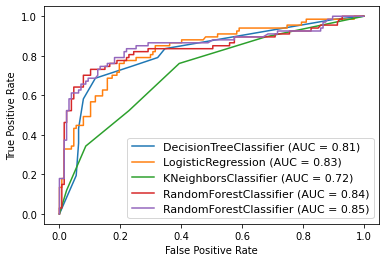

In [400]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import plot_roc_curve


disp = plot_roc_curve(dt, x_test, y_test)
plot_roc_curve(log_reg, x_test, y_test, ax = disp.ax_)
plot_roc_curve(knn, x_test, y_test, ax = disp.ax_)
plot_roc_curve(rf, x_test, y_test, ax = disp.ax_)
plot_roc_curve(RF, x_test, y_test, ax = disp.ax_)
plt.legend(prop = {'size' : 11}, loc = 'lower right')
plt.show()

We can consider our RandomForest model with hyperparameter tuning as the best model for this dataset.

# Saving our Model

In [401]:
import pickle
filename = "Titanic"
pickle.dump(RF, open(filename,'wb'))